## Extraction of Budget Deficit Data from a website using Webscrapping

In [124]:
#import libraries for Webscrapping
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

#import libraries for working with a dataframe
import pandas as pd
import matplotlib.pyplot as plt

#some styling
plt.style.use("fivethirtyeight")
pd.pandas.set_option('display.max_columns', None)

%matplotlib inline

In [125]:
#Source: Country Economy
url = 'https://countryeconomy.com/deficit/kazakhstan'
response = requests.get(url)

In [126]:
soup = BeautifulSoup(response.text, 'html.parser')

In [127]:
table = soup.find("table")
table

<table class="table tabledat table-striped table-condensed table-hover"><thead><tr class="tableheader"><th>Date</th><th class="eur" title="Government budget deficit">Deficit (M.€)</th><th class="dol" title="Government budget deficit">Deficit  ($M)</th><th title="Deficit Percentage of GDP">Deficit (%GDP)</th></tr></thead><tbody><tr><td class="fecha" data-value="2020-12-01">2020</td><td class="numero eur" data-value="-10564">-10,564</td><td class="numero dol" data-value="-12066">-12,066</td><td class="numero" data-value="-7.03">-7.03%</td></tr><tr><td class="fecha" data-value="2019-12-01">2019</td><td class="numero eur" data-value="-924">-924</td><td class="numero dol" data-value="-1035">-1,035</td><td class="numero" data-value="-0.57">-0.57%</td></tr><tr><td class="fecha" data-value="2018-12-01">2018</td><td class="numero eur" data-value="3919">3,919</td><td class="numero dol" data-value="4629">4,629</td><td class="numero" data-value="2.58">2.58%</td></tr><tr><td class="fecha" data-valu

In [128]:
headings = [th.get_text() for th in table.find("tr").find_all("th")]
headings

['Date', 'Deficit (M.€)', 'Deficit  ($M)', 'Deficit (%GDP)']

In [129]:
datasets = []
for row in table.find_all("tr")[1:]:
    dataset = [td.get_text() for td in row.find_all("td")]
    datasets.append(dataset)

datasets

[['2020', '-10,564', '-12,066', '-7.03%'],
 ['2019', '-924', '-1,035', '-0.57%'],
 ['2018', '3,919', '4,629', '2.58%'],
 ['2017', '-6,313', '-7,132', '-4.27%'],
 ['2016', '-5,589', '-6,187', '-4.50%'],
 ['2015', '-10,406', '-11,546', '-6.26%'],
 ['2014', '4,142', '5,503', '2.48%'],
 ['2013', '8,815', '11,707', '4.95%'],
 ['2012', '7,173', '9,216', '4.43%'],
 ['2011', '8,050', '11,206', '5.81%'],
 ['2010', '1,643', '2,178', '1.47%'],
 ['2009', '-1,102', '-1,537', '-1.33%'],
 ['2008', '1,119', '1,646', '1.23%'],
 ['2007', '3,933', '5,391', '5.13%'],
 ['2006', '4,941', '6,204', '7.65%'],
 ['2005', '2,794', '3,475', '6.08%'],
 ['2004', '1,142', '1,421', '3.29%'],
 ['2003', '1,091', '1,235', '4.00%'],
 ['2002', '503', '476', '1.92%']]

In [130]:
df = pd.DataFrame(data=datasets)
df.columns = headings
df = df.reindex(index=df.index[::-1])
df

,Date,Deficit (M.€),Deficit ($M),Deficit (%GDP)
18,2002,503,476,1.92%
17,2003,"1,091","1,235",4.00%
16,2004,"1,142","1,421",3.29%
15,2005,"2,794","3,475",6.08%
14,2006,"4,941","6,204",7.65%
13,2007,"3,933","5,391",5.13%
12,2008,"1,119","1,646",1.23%
11,2009,"-1,102","-1,537",-1.33%
10,2010,"1,643","2,178",1.47%
9,2011,"8,050","11,206",5.81%


In [131]:
df.dtypes

Date              object
Deficit (M.€)     object
Deficit  ($M)     object
Deficit (%GDP)    object
dtype: object

In [137]:
for i in df.index:
    df['Deficit (%GDP)'][i] = float(df['Deficit (%GDP)'][i][:-1])
df

,Date,Deficit (M.€),Deficit ($M),Deficit (%GDP)
18,2002,503.0,476.0,1.9
17,2003,1091.0,1235.0,4.0
16,2004,1142.0,1421.0,3.2
15,2005,2794.0,3475.0,6.0
14,2006,4941.0,6204.0,7.6
13,2007,3933.0,5391.0,5.1
12,2008,1119.0,1646.0,1.2
11,2009,-1102.0,-1537.0,-1.3
10,2010,1643.0,2178.0,1.4
9,2011,8050.0,11206.0,5.8


In [133]:
for i in df.index:
    for j in df[['Deficit (M.€)', 'Deficit  ($M)']]:
        df[j][i] = float(df[j][i].replace(',', ''))


In [138]:
df

,Date,Deficit (M.€),Deficit ($M),Deficit (%GDP)
18,2002,503.0,476.0,1.9
17,2003,1091.0,1235.0,4.0
16,2004,1142.0,1421.0,3.2
15,2005,2794.0,3475.0,6.0
14,2006,4941.0,6204.0,7.6
13,2007,3933.0,5391.0,5.1
12,2008,1119.0,1646.0,1.2
11,2009,-1102.0,-1537.0,-1.3
10,2010,1643.0,2178.0,1.4
9,2011,8050.0,11206.0,5.8


<AxesSubplot:xlabel='Date'>

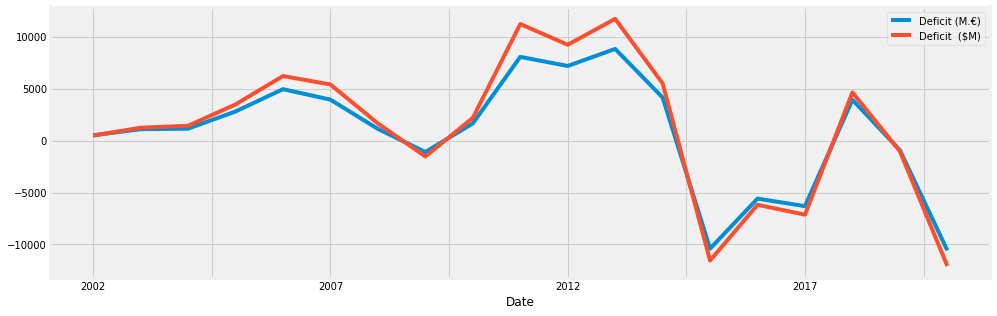

In [154]:
df.iloc[:, 0:3].plot(x="Date", figsize=(15,5))

<AxesSubplot:xlabel='Date'>

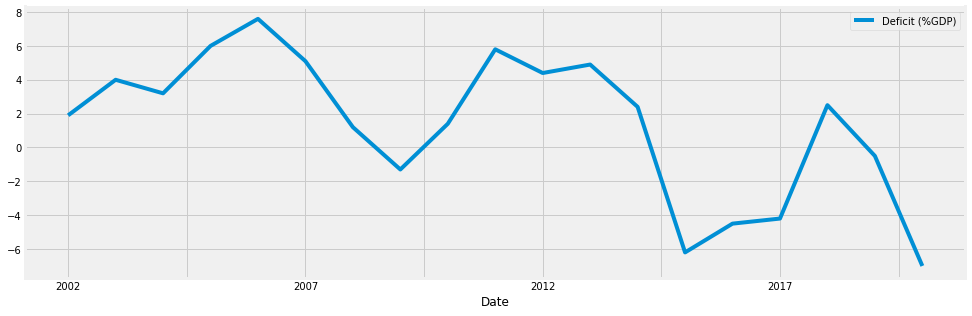

In [155]:
df.drop(['Deficit (M.€)', 'Deficit  ($M)'], axis=1).plot(x="Date", figsize=(15,5))